In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
stock_price = pd.read_csv('../ibm-common-stock-closing-prices.csv', index_col = 0)
stock_price.head(10)

,IBM common stock closing prices
Date,
1962-01-02,572.00
1962-01-03,577.00
1962-01-04,571.25
1962-01-05,560.00
1962-01-08,549.50
1962-01-09,556.00
1962-01-10,557.00
1962-01-11,563.00
1962-01-12,564.00


In [3]:
stock_price.rename(columns={'IBM common stock closing prices': 'Close_price'}, inplace = True)

In [4]:
stock_price['5 day Moving Avg'] = stock_price['Close_price'].rolling(5).mean()

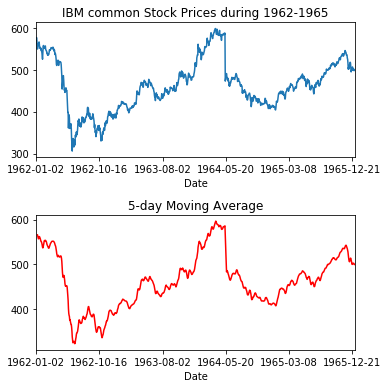

In [5]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(2, 1, 1)
stock_price['Close_price'].plot(ax = ax)
ax.set_title('IBM common Stock Prices during 1962-1965')
ax = fig.add_subplot(2, 1, 2)
stock_price['5 day Moving Avg'].plot(ax = ax, color='r')
ax.set_title('5-day Moving Average')
plt.tight_layout()

In [6]:
stock_price.reset_index(inplace = True)

In [7]:
MA2 = stock_price['Close_price'].rolling(2).mean()
TwoXMA2 = MA2.rolling(2).mean()

MA4 = stock_price['Close_price'].rolling(4).mean()
TwoXMA4 = MA4.rolling(2).mean()

MA3 = stock_price['Close_price'].rolling(3).mean()
ThreeXMA3 = MA3.rolling(3).mean()

In [8]:
# Removing NaNs from the preceding variables.
MA2 = MA2[~pd.isnull(MA2)]
TwoXMA2 = TwoXMA2[TwoXMA2.notnull()]

MA4 = MA4[MA4.notnull()]
TwoXMA4 = TwoXMA4[~TwoXMA4.isnull()]

MA3 = MA3[MA3.notnull()]
ThreeXMA3 = ThreeXMA3[ThreeXMA3.notnull()]

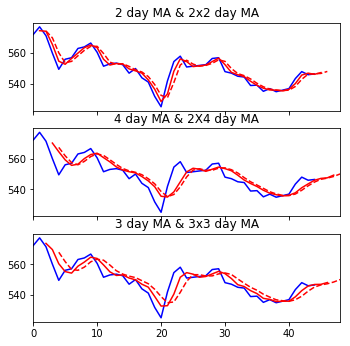

In [9]:
f, axarr = plt.subplots(3, sharex = True)
f.set_size_inches(5.5, 5.5)
stock_price['Close_price'].iloc[:45].plot(color = 'b', linestyle = '-', ax = axarr[0])
MA2.iloc[:45].plot(color = 'r', linestyle = '-', ax = axarr[0])
TwoXMA2.iloc[:45].plot(color = 'r', linestyle = '--', ax = axarr[0])
axarr[0].set_title('2 day MA & 2x2 day MA')

stock_price['Close_price'].iloc[:45].plot(color= 'b', linestyle = '-', ax = axarr[1])
MA4.iloc[:45].plot(color= 'r', linestyle = '-', ax = axarr[1])
TwoXMA4.iloc[:45].plot(color = 'r', linestyle = '--', ax = axarr[1])
axarr[1].set_title('4 day MA & 2X4 day MA')

stock_price['Close_price'].iloc[:45].plot(color = 'b', linestyle = '-', ax = axarr[2])
MA3.iloc[:45].plot(color = 'r', linestyle ='-', ax = axarr[2])
ThreeXMA3.iloc[:45].plot(color = 'r', linestyle = '--', ax = axarr[2])
axarr[2].set_title('3 day MA & 3x3 day MA')

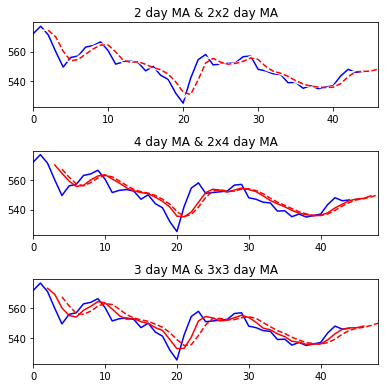

In [13]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(3, 1, 1)
stock_price['Close_price'].iloc[:45].plot(color = 'b', linestyle = '-', ax = ax)
MA2[:45].plot(linestyle = '-',color = '4', ax =ax)
TwoXMA2[:45].plot(linestyle = '--' ,color='r', ax = ax)
ax.set_title('2 day MA & 2x2 day MA')
ax = fig.add_subplot(3, 1, 2)
stock_price['Close_price'].iloc[:45].plot(linestyle= '-', color='b', ax = ax)
MA4.iloc[:45].plot(linestyle = '-', color ='r', ax = ax )
TwoXMA4.iloc[:45].plot(color='r',linestyle ='--', ax = ax)
ax.set_title('4 day MA & 2x4 day MA')

ax = fig.add_subplot(3, 1, 3)
stock_price['Close_price'].iloc[:45].plot(color = 'b', linestyle = '-', ax = ax)
MA3.iloc[:45].plot(color = 'r', linestyle ='-', ax = ax)
ThreeXMA3.iloc[:45].plot(color = 'r', linestyle = '--', ax = ax)
ax.set_title('3 day MA & 3x3 day MA')
plt.tight_layout()

# Sharex is not there!